<center> <h1> <b>Song Birds<b></h1> </center>
<center> <h1>Model Automatization and Code Update</h1> </center>

# Import Libraries, Functions, and Classes

In [1]:
from song_class import * 

Looking for all wav files in path folder and audios path

In [2]:
#birdname      = 'Zonotrichia capensis'  # Nombre del ave
print("Total number of songs: {}".format(len(sound_files)))

Total number of songs: 91


# Song and Syllable

## Song Definition

In [3]:
num_file = 1
copeton  = Song(sound_files[num_file-1])
copeton.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
gamma,40000.0000,40000.0,10000.0000,100000.000,False
b2,0.00000000,0.0,-inf,inf,False
a2,0.00000000,0.0,-inf,inf,False


## Syllable Definition and Solution

In [4]:
no_syllable = 2
syllable    = copeton.SyllableNo(no_syllable)   # 1) define
syllable.Solve(copeton.p)                       # 2) solve
#syllable.OptimalVariable(kwargs)               # 3) optimize

## Song and Syllable Plot

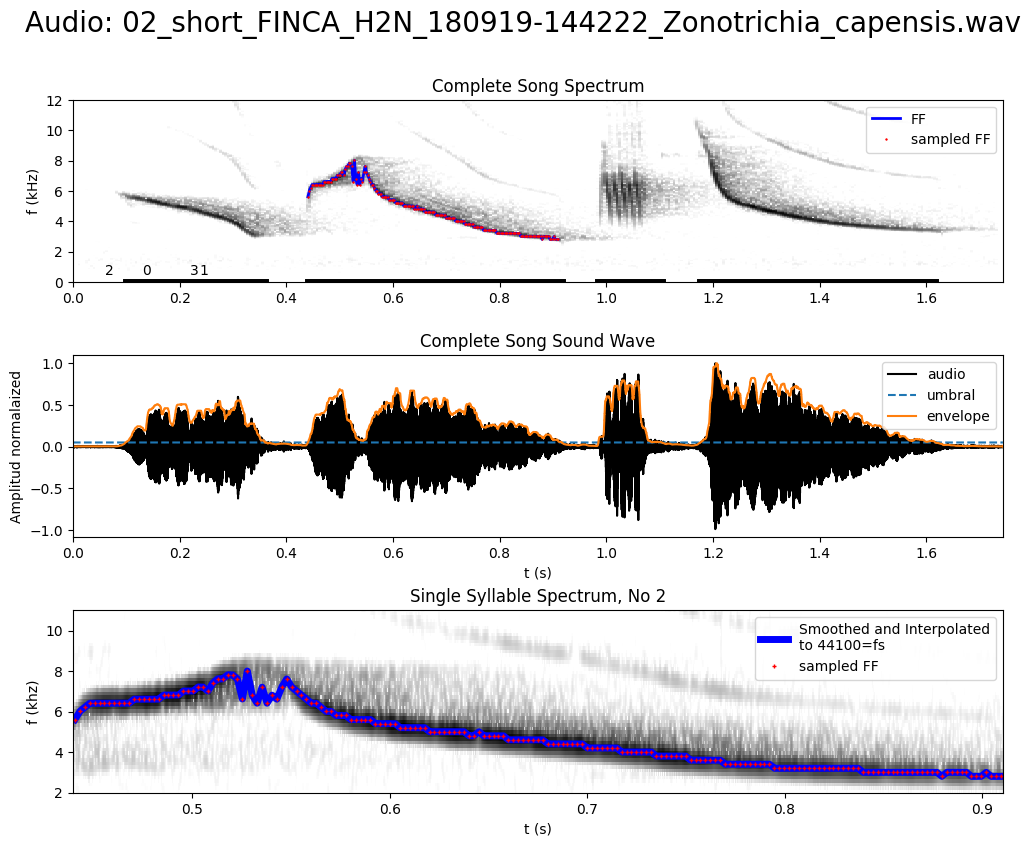

Number of syllables 4


In [5]:
copeton.Plot(sound_files[num_file], 0)          # 4) plot, falg is to plot or not chunck 

# Syllable i-th

## Definition

In [21]:
no_syllable = 4
syllable    = copeton.SyllableNo(no_syllable)
syllable.Solve(copeton.p)

## Plot

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
gamma,10000.0000,40000.0,10000.0000,100000.000,False
b2,0.00000000,0.0,-inf,inf,False
a2,0.00000000,0.0,-inf,inf,False


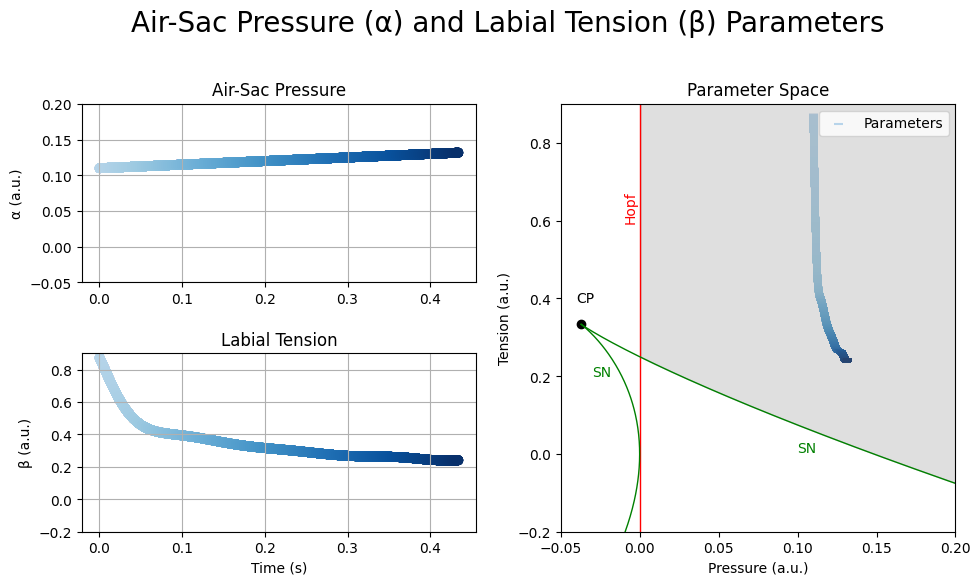

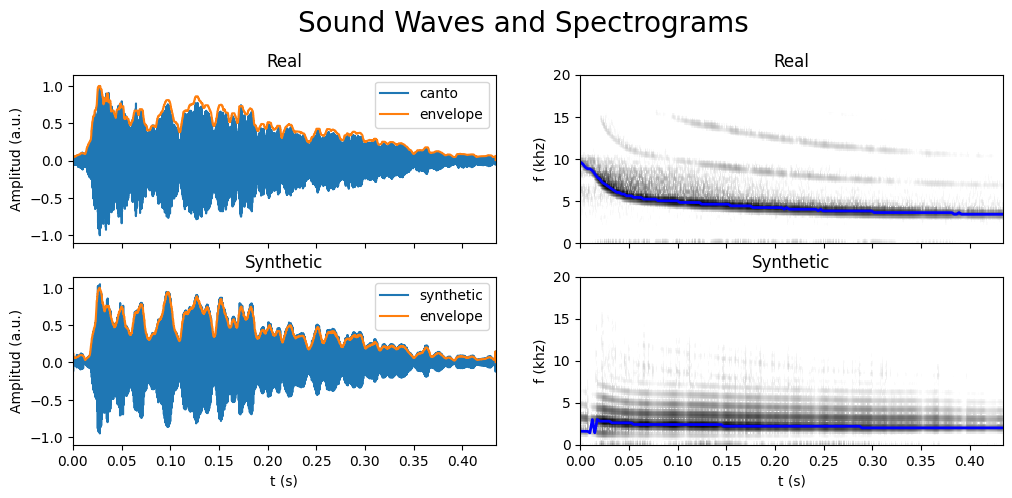

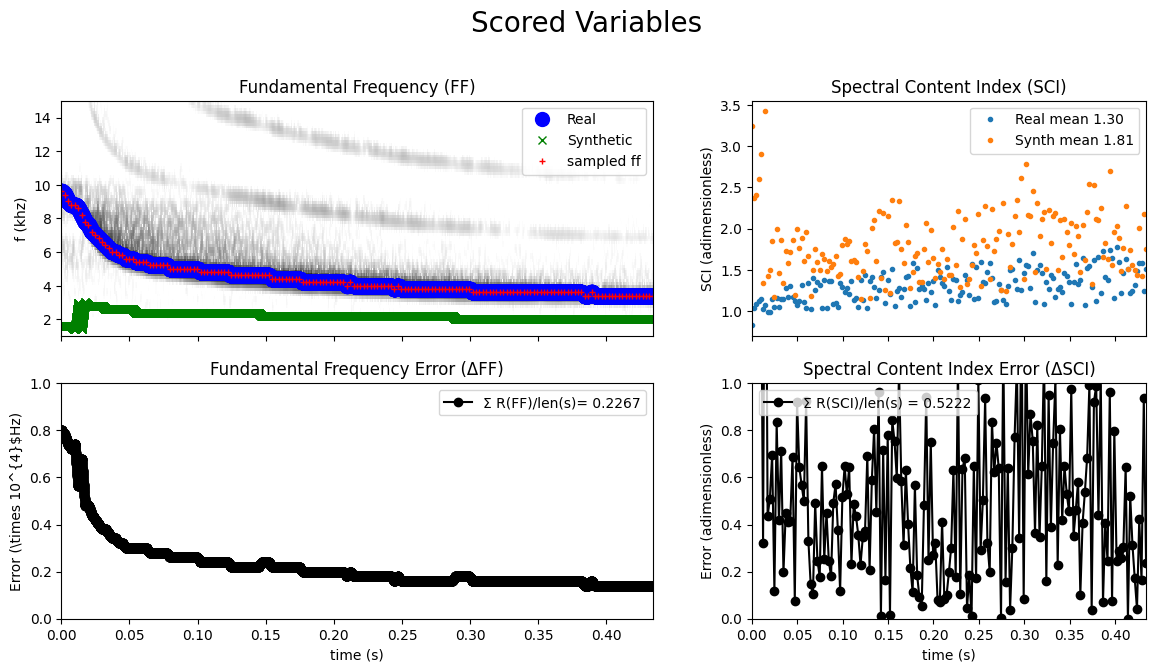

In [7]:
display(syllable.p)
syllable.PlotAlphaBeta()
syllable.PlotSynth()
syllable.Plot(0)
#syllable.PlotVs()

# Chunck i-th 

## Definition

In [8]:
# no_chunck = 1
# chunck    = copeton.Chunck(no_chunck)
# chunck.Solve(copeton.p)

## Plot

In [9]:
# display(chunck.p)
# chunck.PlotAlphaBeta()
# chunck.PlotSynth()
# chunck.Plot(1)
# #chunck.PlotVs()

# Optimization Problem

## General Problem

General problem

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}, a,b\in \mathbb{R}^2}{\text{min}} &\qquad  ||\hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma,a,b)||  + || (\hat{FF_{real} - FF_{synt}(\gamma,a,b)}||\\
    \text { subject to }  & \qquad \gamma \in [0.1, 100000] \\
                          & \qquad  b \in [-1,0.5]\times[0.2,2] \\
                          & \qquad  a \in [0,0.25]\times[-2,2] 
\end{aligned}
\end{equation}

with

$$
\hat{SCI} := \frac{1}{len(SCI)^2} SCI\\
\hat{FF}  := \frac{1}{len(FF)^2} \frac{FF}{10 \; KHz}
$$

where $len()$ is the number of elements of the vector. 

## Auxiliar Problems

In order to solve it let's define three asociated problems

### Optimal $\gamma$

\begin{equation}
\begin{aligned}
\underset{ \gamma \in \mathbb{R}}{\text{min}} &\qquad  || \hat{SCI}_{real} - \hat{SCI}_{synt} ( \gamma)||  + || \hat{FF}_{real} - \hat{FF}_{synt}||\\
    \text { subject to }  & \qquad 0.1 <  \gamma \leq 100000
\end{aligned}
\end{equation}

### Optimal $\beta$ coeficients

The second step is find the constants $b_i$

\begin{equation}
\begin{aligned}
\underset{b \in \mathbb{R}^2}{\text{min}} &\qquad || FF_{real} - FF_{synt} (b)||  \\
    \text { subject to }  & \qquad -1 <  b_0 \leq 0.5, \\
                          &\;\; \qquad 0.2 <  b_1 \leq 2
\end{aligned}
\end{equation}

with

\begin{gather}
\alpha(t) = a_0 + a_1 t, \qquad  \beta(t)=b_0  + b_1\frac{FF_{real}}{10^4} 
\end{gather}

with $t\in [0,T]$ where $T$ is the duration of the sillable (chunck).

### Optimal $\alpha$ coeficients

The coefficients $a_0$ and $a_1$ are calculated with the first harmonic 

\begin{equation}
\begin{aligned}
\underset{a \in \mathbb{R}^2}{\text{min}} &\qquad || \overline{H}_{real}^{st} - \overline{H}_{synt}^{st} (a)||  \\
    \text { subject to }  & \qquad \;\; 0 <  a_0 \leq 0.25, \\
                          & \qquad -2 <  a_1 \leq 2
\end{aligned}
\end{equation}

where $\overline{H}^{st}$ is used to represent the first harmonic amplitude.

## Minimization Solvers and Parameters

In [10]:
brute         = {'method':'brute', 'Ns':21, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}

In [11]:
syllable.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.20000000,2.00000000,False
gamma,10000.0000,40000.0,10000.0000,100000.000,False
b2,0.00000000,0.0,-inf,inf,False
a2,0.00000000,0.0,-inf,inf,False


Finding optimal $\gamma$, $b_0$, and $b_1$ by the brute method

## Minimization Solution

In [12]:
brute["Ns"] = 51 #101
syllable.OptimalGamma(brute) 
syllable.OptimalBs(brute)

γ* =  46000, t=3.3200 min
b_0*=-0.2200, t=3.3082 min
b_1*=0.9920, t=3.3870 min


## Plot Solution

In [13]:
display(syllable.p)
syllable.Solve(syllable.p)

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.00000000,0.25000000,False
a1,0.05000000,0.05,-2.00000000,2.00000000,False
b0,-0.22000000,-0.1,-1.00000000,0.50000000,False
b1,0.99200000,1,0.20000000,2.00000000,False
gamma,46000.0000,40000.0,10000.0000,100000.000,False
b2,0.00000000,0.0,-inf,inf,False
a2,0.00000000,0.0,-inf,inf,False


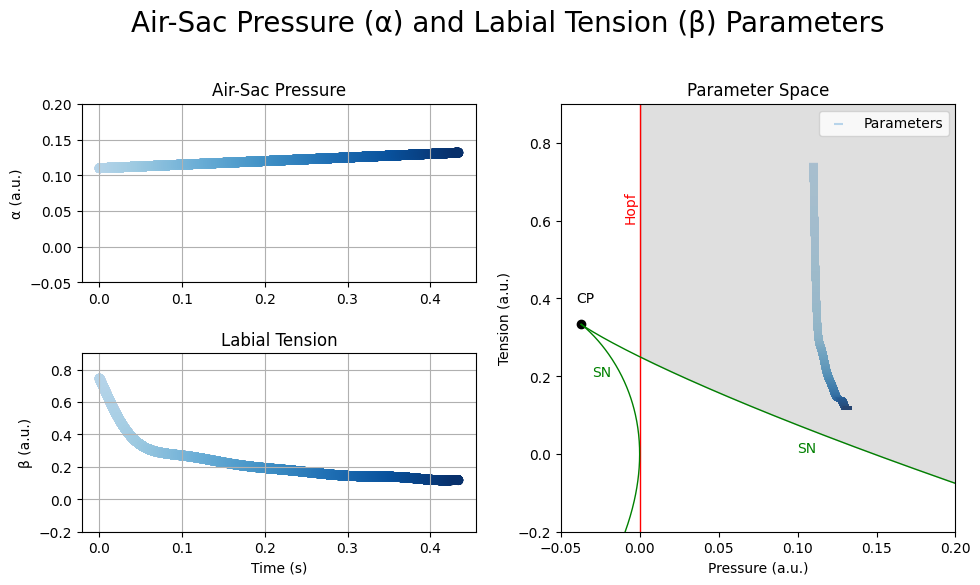

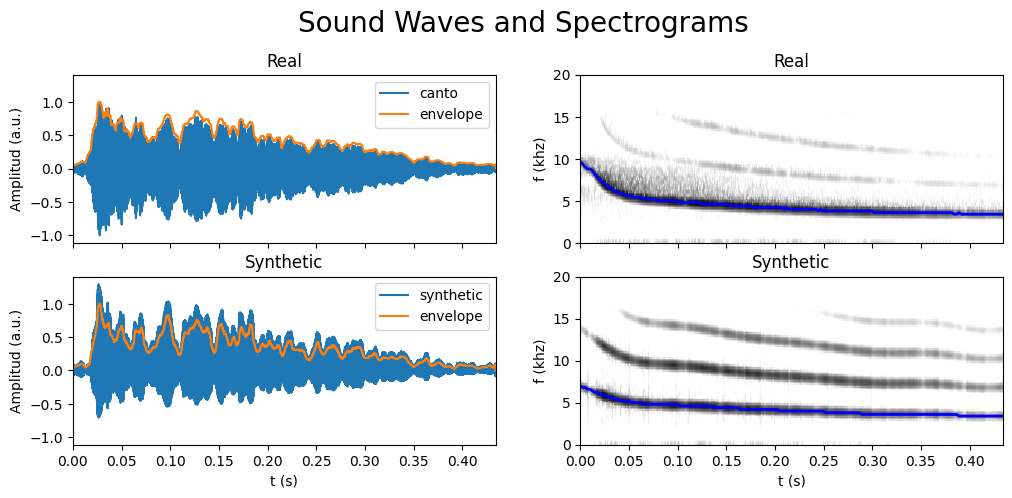

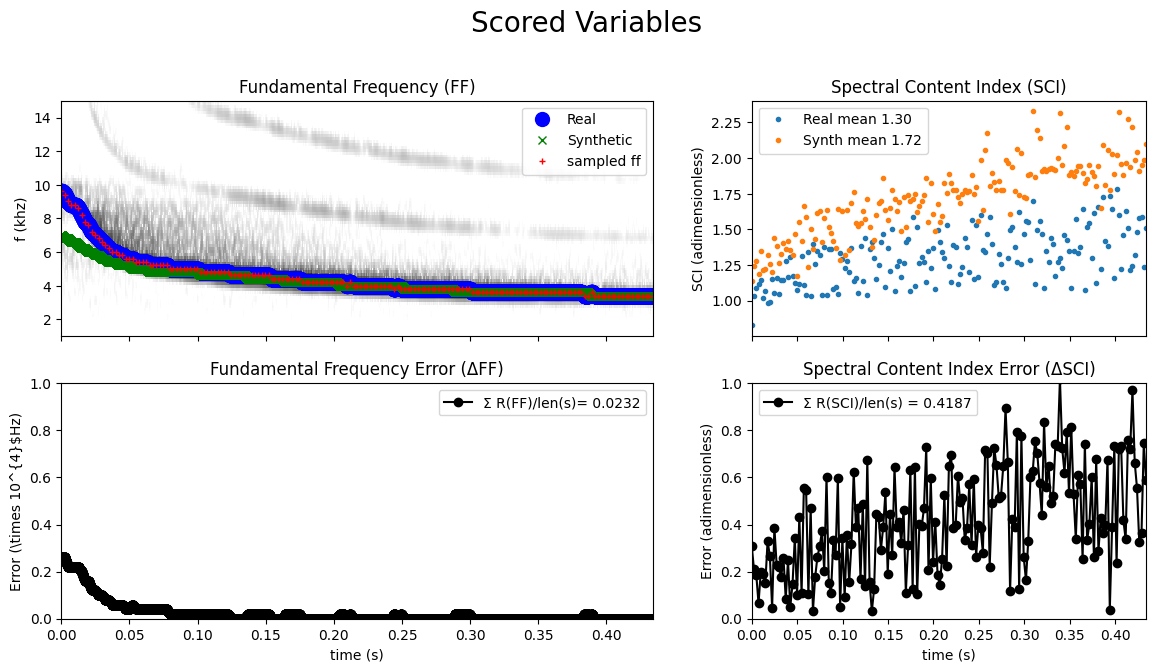

In [14]:
syllable.PlotAlphaBeta()
syllable.PlotSynth()
syllable.Plot(0)

## Write synthetic audio

In [15]:
syllable.Audio(num_file,no_syllable)

# Whole Song

In [16]:
#copeton.WholeSong(num_file, brute, plot=True)#, maxi=len(copeton.syllables)

## Optigam Gamma by Syllable

Calculate optimal gamma for each syllable

In [17]:
#len(copeton.syllables)

In [18]:
#brute["Ns"] = 26
#for i in range(len(copeton.syllables)):
#    copeton.SyllableNo(i+1)
#    copeton.SolveSyllable(copeton.p)
#    copeton.OptimalGamma(brute)
#    copeton.syllable.p

# Proposal Functions

In [19]:
# s, time = copeton.silaba.out_amp, copeton.silaba.time_out
# fs = copeton.silaba.fs
# s_i, t = Windows(s, time, fs)
# i = -2
# f_msf, f_aff, amp = SpectralContentSynth(s_i[i], fs) # method=method
# f_aff#s_i.shape

# maximos = peakutils.indexes(np.abs(np.fft.rfft(s_i[i])), thres=0.15, min_dist=5)

# plt.plot(np.fft.rfftfreq(s_i[i].shape[0], 1/fs),  np.abs(np.fft.rfft(s_i[i])))
# #plt.plot(s_i[i])
# #plt.plot(s)

In [20]:
#y    = np.abs(np.fft.rfft(copeton.silaba.out_amp)) #[5:-5]
#freq = np.fft.rfftfreq(copeton.silaba.out_amp.size, d=1/copeton.fs)#[5:-5]

#freq, y = freq[5:-5], y # remove inital and final peaks
#peaks, _ = find_peaks(y, distance=10, height=np.max(y)/10)
#peaks = peakutils.indexes(y, thres=0.5, min_dist=30)

#plt.plot(freq,y); #plt.xlim((1, 2e4))
#plt.plot(freq[peaks[0]], y[peaks[0]], "x")

## Video
- Create a function to make video

```` 
import os
os.system("ffmpeg -f image2 -r 1/5 -i ./images/swissGenevaLake%01d.jpg -vcodec mpeg4 -y ./videos/swissGenevaLake.mp4")
````

- Add audio to the video

````
ffmpeg -i yourvideo.avi -i sound.mp3 -c copy -map 0:v:0 -map 1:a:0 output.avi
````

## Improve Pitch Extractor, extract harmonics

## Improve Normalizer and Envelope

## Make itartion for all sillables

# References

{cite}`perez2011python`

```{bibliography} references.bib
```
<div class="csl-entry">[1] Amador, A., Perl, Y. S., Mindlin, G. B., &#38; Margoliash, D. (2013). Elemental gesture dynamics are encoded by song premotor cortical neurons. <i>Nature 2013 495:7439</i>, <i>495</i>(7439), 59–64. <a href="https://doi.org/10.1038/nature11967">https://doi.org/10.1038/nature11967</a> </div>

<br>

<div class="csl-entry">[2] Newville, M., Stensitzki, T., Allen, D. B., &#38; Ingargiola, A. (2014). <i>LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python</i>. <a href="https://doi.org/10.5281/ZENODO.11813">https://doi.org/10.5281/ZENODO.11813</a> </div>
